<a href="https://colab.research.google.com/github/anvisud24/Open-Source-Tools-for-Digital-Twin/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
get_ipython().run_line_magic('matplotlib', 'inline')
mpl.rcParams['figure.dpi'] = 300

In [ ]:
dataset = pd.read_csv("gene_dataset_final.csv")
dataset.head()


,type,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,...,PTCHD1,M1AP,ZSCAN4,ZSCAN4.1,VWA5B1,VWA5B1.1,LINC00311,HTR6,MAGEB6,LOC101060464 /// LOC101929858 /// LOC101930165 /// LOC101930171 /// TCEB3C /// TCEB3CL /// TCEB3CL2
0,GBM,11.36747,9.323879,8.269753,9.632962,5.534698,8.484560,6.528278,6.342163,7.329453,...,6.856444,4.591885,4.739158,5.584155,5.342672,6.390374,5.267818,5.898453,3.354734,5.574529
1,GBM,12.11184,9.909101,8.590495,9.590659,4.558298,7.089286,6.925450,6.184260,5.697576,...,9.217207,3.738654,4.366223,5.694058,5.097125,6.574713,5.122915,6.044274,3.333139,4.978582
2,GBM,12.68623,9.432470,7.565431,8.513028,4.460844,7.726511,7.024936,5.948060,4.969492,...,9.372210,3.675539,3.945667,4.715144,5.444706,6.072424,4.426577,4.999496,3.340092,4.450215
3,GBM,12.95673,8.603778,8.311467,8.205823,4.256073,7.692394,8.013890,6.401934,6.197651,...,9.028017,4.319005,4.377076,4.400815,4.938128,5.338926,4.747617,5.201266,3.351883,4.344490
4,GBM,12.13290,9.142464,9.628997,8.700961,4.475803,8.451584,7.431643,5.828555,5.798270,...,8.155733,4.000151,4.131463,4.823794,5.083569,5.655747,4.932815,5.383674,3.495330,4.525855


In [ ]:

X = dataset.iloc[:,1:]
X.head()


,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,CYP2E1,...,PTCHD1,M1AP,ZSCAN4,ZSCAN4.1,VWA5B1,VWA5B1.1,LINC00311,HTR6,MAGEB6,LOC101060464 /// LOC101929858 /// LOC101930165 /// LOC101930171 /// TCEB3C /// TCEB3CL /// TCEB3CL2
0,11.36747,9.323879,8.269753,9.632962,5.534698,8.484560,6.528278,6.342163,7.329453,5.404884,...,6.856444,4.591885,4.739158,5.584155,5.342672,6.390374,5.267818,5.898453,3.354734,5.574529
1,12.11184,9.909101,8.590495,9.590659,4.558298,7.089286,6.925450,6.184260,5.697576,5.254970,...,9.217207,3.738654,4.366223,5.694058,5.097125,6.574713,5.122915,6.044274,3.333139,4.978582
2,12.68623,9.432470,7.565431,8.513028,4.460844,7.726511,7.024936,5.948060,4.969492,5.285216,...,9.372210,3.675539,3.945667,4.715144,5.444706,6.072424,4.426577,4.999496,3.340092,4.450215
3,12.95673,8.603778,8.311467,8.205823,4.256073,7.692394,8.013890,6.401934,6.197651,5.878660,...,9.028017,4.319005,4.377076,4.400815,4.938128,5.338926,4.747617,5.201266,3.351883,4.344490
4,12.13290,9.142464,9.628997,8.700961,4.475803,8.451584,7.431643,5.828555,5.798270,5.464882,...,8.155733,4.000151,4.131463,4.823794,5.083569,5.655747,4.932815,5.383674,3.495330,4.525855


In [ ]:
Y=dataset.iloc[:,:1]
Y.head()


,type
0,GBM
1,GBM
2,GBM
3,GBM
4,GBM


In [ ]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
print(X.shape)
PCs = sklearn_pca.fit_transform(X)
print(PCs.shape)


(69, 432)
(69, 2)


<Axes: xlabel='PC1', ylabel='PC2'>

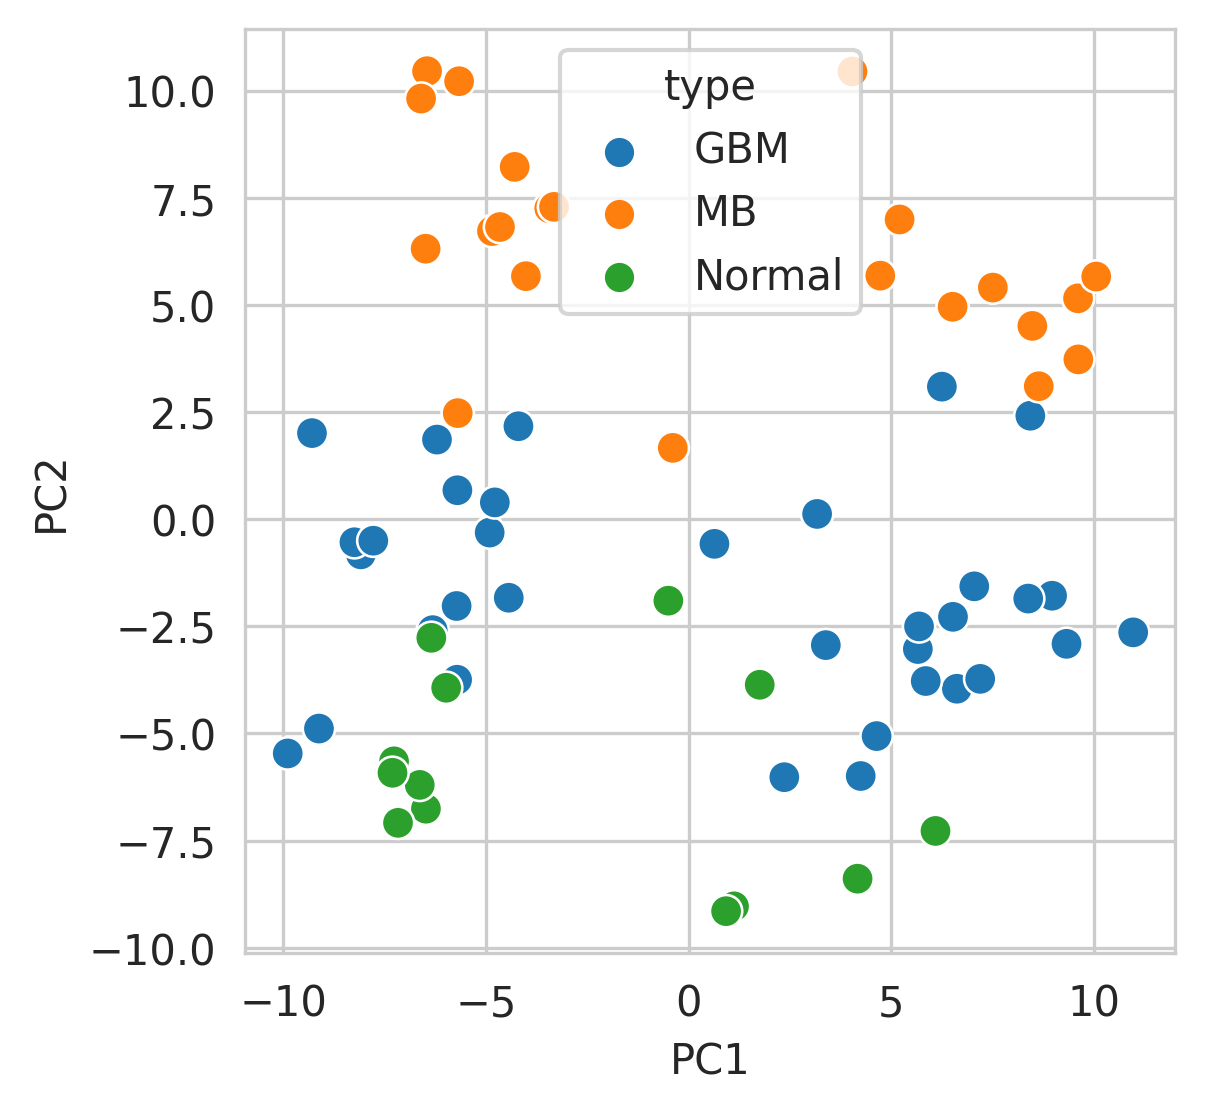

In [ ]:
dataset_transform = pd.DataFrame(PCs,columns=['PC1','PC2'])
dataset_transform = pd.concat([dataset_transform,Y],axis=1)
fig, axes = plt.subplots(figsize=(4,4))
sns.set_style("whitegrid")
sns.scatterplot(x='PC1',y='PC2',data = dataset_transform,hue='type',s=60)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [ ]:
clf = SVC(kernel='linear')

In [ ]:
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.9047619047619048


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8 0 1]
 [1 5 0]
 [0 0 6]]


0.9047619047619048

<Axes: >

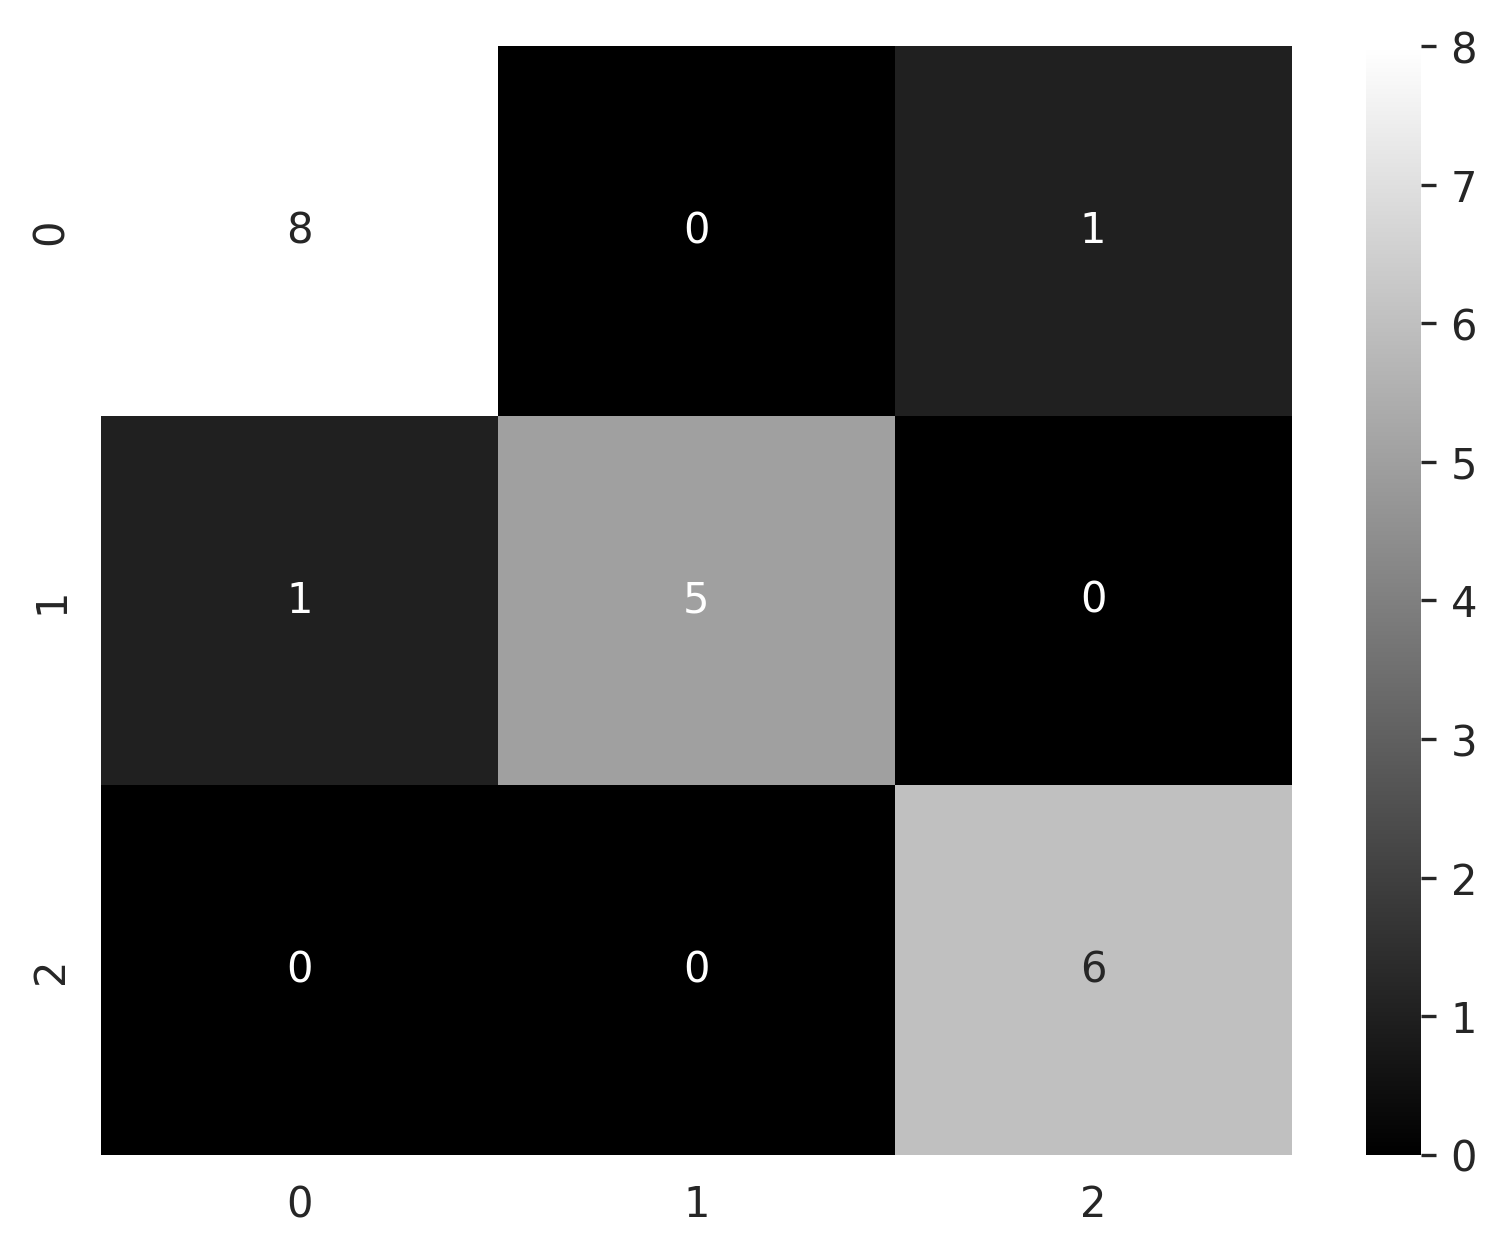

In [ ]:

sns.heatmap(cm,annot=True,fmt='d',cmap="gray")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         GBM       0.89      0.89      0.89         9
          MB       1.00      0.83      0.91         6
      Normal       0.86      1.00      0.92         6

    accuracy                           0.90        21
   macro avg       0.92      0.91      0.91        21
weighted avg       0.91      0.90      0.90        21



In [ ]:
coeff_df = pd.DataFrame(clf.coeff_.T, X.columns, columns=['Coefficient'])
coeff_df= coeff_df.sort_values(by=['Coefficient'],ascending=False)
coeff_df

AttributeError: ignored

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
coefficients = clf.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
support_vectors = clf.support_vectors_
print("Support Vectors:")
print(support_vectors)

Support Vectors:
[[12.68623   9.43247   7.565431 ...  4.999496  3.340092  4.450215]
 [12.42215   8.175979  7.239501 ...  5.68668   3.410826  4.758504]
 [12.95673   8.603778  8.311467 ...  5.201266  3.351883  4.34449 ]
 ...
 [10.70182   8.467377  6.946708 ...  5.299178  3.558115  4.621185]
 [11.60726   7.082855  7.394746 ...  6.205028  3.590489  5.486828]
 [11.29989   8.28618   6.993723 ...  5.063995  3.348954  4.706811]]


In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
coefficients = clf.coef_
print("Coefficients:")
print(coefficients)

Coefficients:
[[ 0.02970482  0.0177298   0.01444702 ...  0.00663682  0.00188498
   0.00197992]
 [ 0.01605318  0.02370526  0.01459449 ... -0.00034843 -0.0014804
  -0.00270305]
 [ 0.00376119  0.01474547  0.00310127 ... -0.00621656 -0.00125152
  -0.00453424]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
coefficients = clf.coef_
feature_names = X.columns

# Create a DataFrame to display the coefficients with feature names for each class
coeff_df = pd.DataFrame(coefficients, columns=feature_names, index=clf.classes_)

# Transpose the DataFrame for a more intuitive view
coeff_df = coeff_df.T
coeff_df = coeff_df.sort_values(by=['coefficients'],ascending = False)
coeff_df








KeyError: ignored

In [ ]:
coeff_df = pd.Dataframe(clf.coef_.T, X.columns, columns = ['coefficients'])

AttributeError: ignored

In [ ]:
coeff_df.to_excel('imp_feat.xlsx')

,GBM,MB,Normal
DDR1 /// MIR4640,0.029705,0.016053,0.003761
RFC2,0.017730,0.023705,0.014745
HSPA6,0.014447,0.014594,0.003101
PAX8,0.000221,-0.001671,-0.000822
GUCA1A,0.009927,-0.019358,-0.018819
...,...,...,...
VWA5B1.1,0.002961,-0.003007,-0.001393
LINC00311,-0.002271,-0.000342,-0.001417
HTR6,0.006637,-0.000348,-0.006217
MAGEB6,0.001885,-0.001480,-0.001252


In [ ]:
coeff_df.to_excel('imp_feat.xlsx')